# Linear Regression - car mpg with other attributes

# 8 variables: 

1.- MPG (miles per gallon)

2.- cylinders

3.- engine displacement (cu. inches)

4.- horsepower

5.- vehicle weight (lbs.)

6.- time to accelerate from O to 60 mph (sec.)

7.- model year (modulo 100), and

8.- origin of car (1. American, 2. European,3. Japanese).


<p style="color:blue;"> Importing Libraries</p>

In [1]:
# Imporitng libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%import matplotlib.style
#%plt.style.use('classic')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

In [2]:
# importing the file into pandas dataframe
data_df = pd.read_csv("car-mpg.csv")

In [3]:
# check head data records
print('Data Size=',data_df.shape)
data_df.head()

Data Size= (398, 10)


,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
# Dropping car name
data_df.drop(columns='car_name', inplace=True)
print('Data Size=',data_df.shape)
data_df.head()

Data Size= (398, 9)


,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


In [5]:
# Data Information
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


<p style="color:blue;"> Analyzing the data hp=horsepower</p>

In [6]:
# lets find the string in the numerical column
temp = pd.DataFrame(data_df.hp.str.isdigit())
temp[temp.hp == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [7]:
# checking thos rows i the original data
data_df.iloc[[32,126,330,336,354,374]]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
32,25.0,4,98.0,?,2046,19.0,71,1,1
126,21.0,6,200.0,?,2875,17.0,74,1,0
330,40.9,4,85.0,?,1835,17.3,80,2,1
336,23.6,4,140.0,?,2905,14.3,80,1,1
354,34.5,4,100.0,?,2320,15.8,81,2,1
374,23.0,4,151.0,?,3035,20.5,82,1,1


In [8]:
# replacing the "?" by the hp median
# To find the mediam of hp replace "?" by nan first
data_df = data_df.replace('?', np.nan)
data_df.iloc[[32,126,330,336,354,374]]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
32,25.0,4,98.0,NaN,2046,19.0,71,1,1
126,21.0,6,200.0,NaN,2875,17.0,74,1,0
330,40.9,4,85.0,NaN,1835,17.3,80,2,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1
354,34.5,4,100.0,NaN,2320,15.8,81,2,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1


In [9]:
# median value
med = data_df.hp.median()
print('hp median=', med)

hp median= 93.5


In [10]:
data_df.hp = data_df.hp.astype(float)

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        392 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


In [12]:
# replacing "NaN" with median value
data_df = data_df.apply(lambda x:x.fillna(x.median()))
data_df.iloc[[32,126,330,336,354,374]]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
32,25.0,4,98.0,93.5,2046,19.0,71,1,1
126,21.0,6,200.0,93.5,2875,17.0,74,1,0
330,40.9,4,85.0,93.5,1835,17.3,80,2,1
336,23.6,4,140.0,93.5,2905,14.3,80,1,1
354,34.5,4,100.0,93.5,2320,15.8,81,2,1
374,23.0,4,151.0,93.5,3035,20.5,82,1,1


In [13]:
data_df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864,0.530151
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055,0.499718
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,0.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


<p style="color:blue;"> Analyzing every feature</p>

In [14]:
#sns.pairplot(data_df, diag_kind='kde')

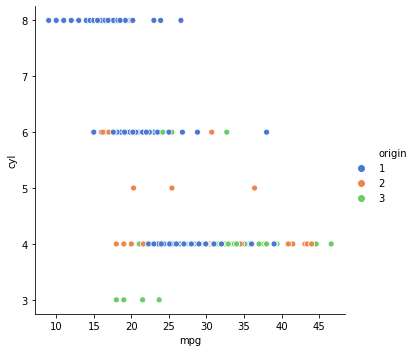

In [15]:
# 1.- Analyzing variable cyl
sns.relplot(x='mpg', y='cyl', hue='origin', data=data_df, palette="muted")

<p style="color:red;"> How many cars or percent are the cars with 3 & 5 cylinders</p>

In [16]:
data_df.groupby('cyl').count()

,mpg,disp,hp,wt,acc,yr,origin,car_type
cyl,,,,,,,,
3,4,4,4,4,4,4,4,4
4,204,204,204,204,204,204,204,204
5,3,3,3,3,3,3,3,3
6,84,84,84,84,84,84,84,84
8,103,103,103,103,103,103,103,103


In [17]:
cyl3 = data_df.cyl[data_df.cyl==3].count()
print('Car with 3 cylinders =', round(cyl3/data_df.shape[0]*100,2),'%')
cyl5 = data_df.cyl[data_df.cyl==5].count()
print('Car with 5 cylinders =', round(cyl5/data_df.shape[0]*100,2),'%')

Car with 3 cylinders = 1.01 %
Car with 5 cylinders = 0.75 %


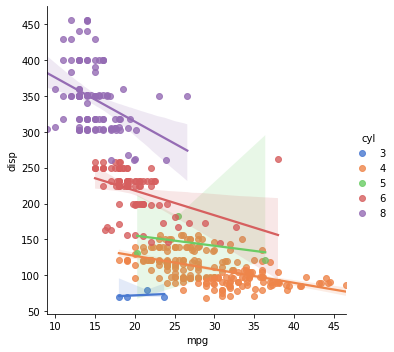

In [18]:
# 2.- Analyzing variable disp
sns.lmplot(x='mpg', y='disp', data=data_df, hue='cyl', palette="muted")

In [19]:
# locating and dropping data point disp >250 & mpg >35 outside range
d_ind = data_df.loc[(data_df.disp>250) & (data_df.mpg>35) ].index

In [20]:
#data_df=data_df.drop[index='data_df.iloc[(data_df.disp>250) & (data_df.mpg>35) ]'] 
data_df=data_df.drop(d_ind)


In [21]:
data_df.shape

(397, 9)

In [22]:
data_df.reset_index(drop=True)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,1
393,44.0,4,97.0,52.0,2130,24.6,82,2,1
394,32.0,4,135.0,84.0,2295,11.6,82,1,1
395,28.0,4,120.0,79.0,2625,18.6,82,1,1


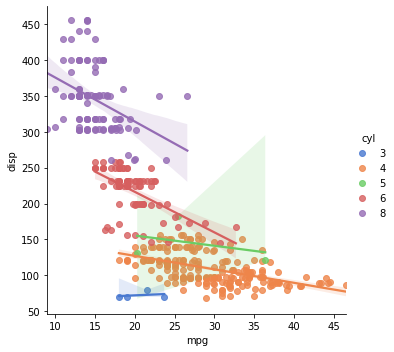

In [23]:
sns.lmplot(x='mpg', y='disp', data=data_df, hue='cyl', palette="muted")

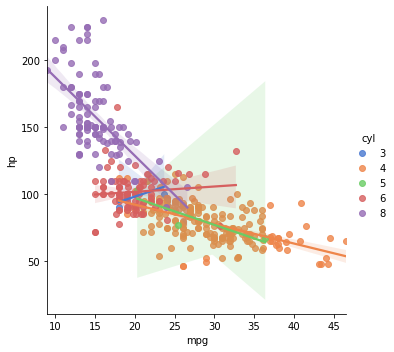

In [24]:
# 3.- Analyzing variable hp
sns.lmplot(x='mpg', y='hp', data=data_df, hue='cyl', palette="muted")

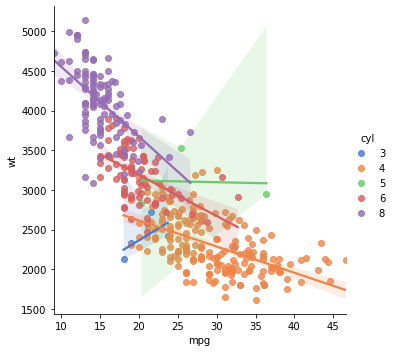

In [25]:
# 4.- Analyzing the variable wt
sns.lmplot(x='mpg', y='wt', data=data_df, hue='cyl', palette="muted") #style='car_type',

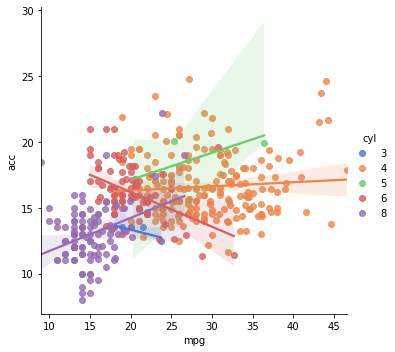

In [26]:
# 5.- Analyzing the variable acc
sns.lmplot(x='mpg', y='acc', data=data_df, hue='cyl',palette="muted")

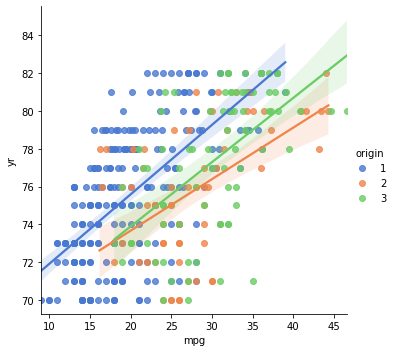

In [27]:
# 6.- Analyzing variable yr
sns.lmplot(x='mpg', y='yr', data=data_df, hue='origin', palette="muted")

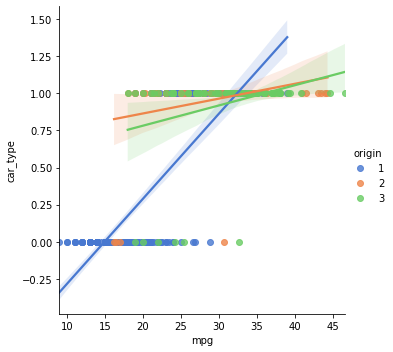

In [28]:
sns.lmplot(x='mpg', y='car_type', data=data_df, hue='origin', palette="muted")

<p style="color:blue;">Creating Dummy Variables </p>

In [29]:
data_df.nunique()

mpg         129
cyl           5
disp         82
hp           94
wt          350
acc          95
yr           13
origin        3
car_type      2
dtype: int64

In [30]:
# Creating dummy variable for cyl, origin, car_type
mpg_df = pd.get_dummies(data_df, columns=['cyl','origin','car_type','yr'])

In [31]:
print("New mpg_df shape =",mpg_df.shape)
mpg_df.head().T

New mpg_df shape = (397, 28)


,0,1,2,3,4
mpg,18.0,15.0,18.0,16.0,17.0
disp,307.0,350.0,318.0,304.0,302.0
hp,130.0,165.0,150.0,150.0,140.0
wt,3504.0,3693.0,3436.0,3433.0,3449.0
acc,12.0,11.5,11.0,12.0,10.5
cyl_3,0.0,0.0,0.0,0.0,0.0
cyl_4,0.0,0.0,0.0,0.0,0.0
cyl_5,0.0,0.0,0.0,0.0,0.0
cyl_6,0.0,0.0,0.0,0.0,0.0
cyl_8,1.0,1.0,1.0,1.0,1.0


<p style="color:blue;">Applying label encoder to years </p>

In [32]:
# Import label encoder 
# from sklearn import preprocessing 
  
# # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 
  
# # Encode labels in column 'species'. 
# mpg_df['years']= label_encoder.fit_transform(mpg_df['yr']) 
  
# mpg_df['years'].unique() 

In [33]:
mpg_df.head().T

,0,1,2,3,4
mpg,18.0,15.0,18.0,16.0,17.0
disp,307.0,350.0,318.0,304.0,302.0
hp,130.0,165.0,150.0,150.0,140.0
wt,3504.0,3693.0,3436.0,3433.0,3449.0
acc,12.0,11.5,11.0,12.0,10.5
cyl_3,0.0,0.0,0.0,0.0,0.0
cyl_4,0.0,0.0,0.0,0.0,0.0
cyl_5,0.0,0.0,0.0,0.0,0.0
cyl_6,0.0,0.0,0.0,0.0,0.0
cyl_8,1.0,1.0,1.0,1.0,1.0


In [34]:
mpg_df.nunique()

mpg           129
disp           82
hp             94
wt            350
acc            95
cyl_3           2
cyl_4           2
cyl_5           2
cyl_6           2
cyl_8           2
origin_1        2
origin_2        2
origin_3        2
car_type_0      2
car_type_1      2
yr_70           2
yr_71           2
yr_72           2
yr_73           2
yr_74           2
yr_75           2
yr_76           2
yr_77           2
yr_78           2
yr_79           2
yr_80           2
yr_81           2
yr_82           2
dtype: int64

<p style="color:blue;"> Filtering data before analysis </p>

1.- drop column yr because it was changed to label encoder

2.- drop car with 3 & 5 cylinders because data is under 1%

3.- drop car type because no enough information about labeling

In [35]:
mpg_df = mpg_df.drop(['car_type_0','car_type_1', 'cyl_3', 'cyl_5'], axis=1)

In [36]:
mpg_df.sum()

mpg            9320.8
disp          76721.5
hp            41428.0
wt          1179214.0
acc            6179.1
cyl_4           204.0
cyl_6            83.0
cyl_8           103.0
origin_1        248.0
origin_2         70.0
origin_3         79.0
yr_70            29.0
yr_71            28.0
yr_72            28.0
yr_73            40.0
yr_74            27.0
yr_75            30.0
yr_76            34.0
yr_77            28.0
yr_78            36.0
yr_79            29.0
yr_80            29.0
yr_81            29.0
yr_82            30.0
dtype: float64

<p style="color:blue;"> Split Data X & y (70:30)</p>

In [37]:
X = mpg_df.drop(columns=['mpg'])
X.shape

(397, 23)

In [38]:
y = mpg_df['mpg']
y.shape

(397,)

In [39]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<p style="color:blue;"> First linear regression model </p>

In [40]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [41]:
regression_model.coef_

array([ 1.38525395e-02, -4.50961132e-02, -5.71852553e-03, -1.24515885e-02,
        3.91727503e+00,  1.58930659e+00,  4.60826298e+00, -1.29005240e+00,
        7.80069659e-01,  5.09982745e-01, -3.26035906e+00, -2.12492075e+00,
       -3.61785275e+00, -3.95749838e+00, -1.76734736e+00, -2.02420992e+00,
       -1.50444049e+00,  3.28435780e-01, -1.99019109e-02,  2.39456139e+00,
        6.72681996e+00,  4.03543990e+00,  4.79127359e+00])

In [42]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for disp is 0.013852539493295188
The coefficient for hp is -0.04509611315731536
The coefficient for wt is -0.005718525528256035
The coefficient for acc is -0.012451588546767211
The coefficient for cyl_4 is 3.917275029798788
The coefficient for cyl_6 is 1.5893065872931322
The coefficient for cyl_8 is 4.60826298347598
The coefficient for origin_1 is -1.2900524036479886
The coefficient for origin_2 is 0.7800696588777515
The coefficient for origin_3 is 0.5099827447702289
The coefficient for yr_70 is -3.2603590629365358
The coefficient for yr_71 is -2.124920748962672
The coefficient for yr_72 is -3.617852748251408
The coefficient for yr_73 is -3.957498381210529
The coefficient for yr_74 is -1.7673473583949941
The coefficient for yr_75 is -2.0242099236440305
The coefficient for yr_76 is -1.5044404941298612
The coefficient for yr_77 is 0.328435779583827
The coefficient for yr_78 is -0.019901910917290523
The coefficient for yr_79 is 2.394561392557756
The coefficient for yr_80 i

In [43]:
# Let us check the intercept for the model

intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 39.92284312238915


In [44]:
# Train data score
regression_model.score(X_train, y_train)

0.8747607293705761

In [45]:
# Test data score
regression_model.score(X_test, y_test)

0.8627133433846215

In [46]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head().T

,350,59,120,12,349
disp,105.0,97.0,121.0,400.0,91.0
hp,63.0,54.0,112.0,150.0,68.0
wt,2215.0,2254.0,2868.0,3761.0,1985.0
acc,14.9,23.5,15.5,9.5,16.0
cyl_4,1.0,1.0,1.0,0.0,1.0
cyl_6,0.0,0.0,0.0,0.0,0.0
cyl_8,0.0,0.0,0.0,1.0,0.0
origin_1,1.0,0.0,0.0,1.0,0.0
origin_2,0.0,1.0,1.0,0.0,0.0
origin_3,0.0,0.0,0.0,0.0,1.0


In [47]:
# evaluating statsmodel and P values
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'mpg ~ disp+hp+wt+acc+cyl_4+cyl_6+cyl_8+origin_1+origin_2+origin_3\
             + yr_70+yr_71+yr_72+yr_73+yr_74+yr_75+yr_76+yr_77\
             +yr_78+yr_79+yr_80+yr_81+yr_82', data = data_train).fit()

In [48]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     84.81
Date:                Thu, 06 Aug 2020   Prob (F-statistic):          3.37e-102
Time:                        16:28:54   Log-Likelihood:                -675.71
No. Observations:                 277   AIC:                             1395.
Df Residuals:                     255   BIC:                             1475.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.3089      1.840     15.382      0.0

<p style="color:blue;"> Second Linear Regression Model </p>

In [49]:
# anaylsing the coefficient of each attributes and statmodel
# drop features = 'hp','wt','disp','acc', 'cyl_6','yr_70','yr_71','yr_74','yr_75','yr_76'
X_train2 = X_train.drop(columns=['wt','disp','acc', 'cyl_6','yr_70','yr_71','yr_74','yr_75','yr_76'])
X_test2 = X_test.drop(columns=['wt','disp','acc', 'cyl_6','yr_70','yr_71','yr_74','yr_75','yr_76'])
X_train2.head()

,hp,cyl_4,cyl_8,origin_1,origin_2,origin_3,yr_72,yr_73,yr_77,yr_78,yr_79,yr_80,yr_81,yr_82
350,63.0,1,0,1,0,0,0,0,0,0,0,0,1,0
59,54.0,1,0,0,1,0,1,0,0,0,0,0,0,0
120,112.0,1,0,0,1,0,0,1,0,0,0,0,0,0
12,150.0,0,1,1,0,0,0,0,0,0,0,0,0,0
349,68.0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [50]:
regression_model2 = LinearRegression()
regression_model2.fit(X_train2, y_train)
# Train data score
print('train score =',regression_model2.score(X_train2, y_train))
print('test score =',regression_model2.score(X_test2, y_test))


train score = 0.8346491658441959
test score = 0.8350104933846316


In [51]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[idx]))

The coefficient for hp is -0.09429395169251238
The coefficient for cyl_4 is 4.99215460100784
The coefficient for cyl_8 is 2.386987750836776
The coefficient for origin_1 is -1.6726176025891257
The coefficient for origin_2 is 0.37951771345091684
The coefficient for origin_3 is 1.2930998891382068
The coefficient for yr_72 is -1.8094084804875872
The coefficient for yr_73 is -1.2681537336661906
The coefficient for yr_77 is 2.5639582675417087
The coefficient for yr_78 is 2.2868823398899623
The coefficient for yr_79 is 4.301612920241482
The coefficient for yr_80 is 7.8503317250691165
The coefficient for yr_81 is 5.883367066169152
The coefficient for yr_82 is 5.967834168330686


In [52]:
# Let us check the intercept for the model

intercept = regression_model2.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 29.04476432398969


In [53]:
data_train2 = pd.concat([X_train2, y_train], axis=1)
data_train2.head().T

,350,59,120,12,349
hp,63.0,54.0,112.0,150.0,68.0
cyl_4,1.0,1.0,1.0,0.0,1.0
cyl_8,0.0,0.0,0.0,1.0,0.0
origin_1,1.0,0.0,0.0,1.0,0.0
origin_2,0.0,1.0,1.0,0.0,0.0
origin_3,0.0,0.0,0.0,0.0,1.0
yr_72,0.0,1.0,0.0,0.0,0.0
yr_73,0.0,0.0,1.0,0.0,0.0
yr_77,0.0,0.0,0.0,0.0,0.0
yr_78,0.0,0.0,0.0,0.0,0.0


In [54]:
# evaluating statsmodel and P values
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'mpg ~ hp+cyl_4+cyl_8+origin_1+origin_2+origin_3\
             + yr_72+yr_73+yr_77+yr_78+yr_79+yr_80+yr_81+yr_82', data = data_train2).fit()

In [55]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     102.1
Date:                Thu, 06 Aug 2020   Prob (F-statistic):           1.11e-94
Time:                        16:28:54   Log-Likelihood:                -714.19
No. Observations:                 277   AIC:                             1456.
Df Residuals:                     263   BIC:                             1507.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.7836      0.935     23.310      0.0

In [56]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred2 = regression_model2.predict(X_test2)

number of data points in the test set = 120


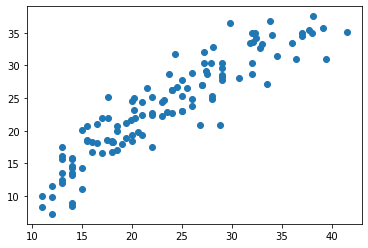

In [57]:
plt.scatter(y_test, y_pred2)
print('number of data points in the test set =', y_test.shape[0])

<p style="color:blue;"> Thrid Linear Regression Model </p>

# Observations

1.- Best score was using dummies for years, cylinders, and origin

2.- Cars with 3 and 5 cylinders were dropped because they had less than 1% total data points

3.- Using the linear regression coeficientes as reference the follow features were dropped:
['wt','disp','acc', 'cyl_6','yr_70','yr_71','yr_74','yr_75','yr_76']

4.- Linear regression interceptor in the second model is 29.04 (First model was 39.9)

4.- Second Linear Regression Model: Train Score =83.4% and Test score = 83.5% (mpg mean = 23.5)

5.- Label encoder used for years gave lower score

